In [1]:
from umi_surrogate import UmiSurrogate
from surrogate import Surrogate
from schema import Schema
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Couldn't import dot_parser, loading of dot files will not be possible.


c:\Users\zoele\anaconda3\envs\ml-for-bem\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
INFO:UmiSurrogate:Umi shoebox hourly energy will be saved in c:\Users\zoele\Git_Repos\ml-for-building-energy-modeling\ml-for-bem\umi\energy


In [2]:
# surrogate = Surrogate(schema=schema)

# print(surrogate.eui_core_heating_max)
# print(surrogate.eui_core_cooling_max)

In [3]:
# umi_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi/Sample/SampleBuildings.umi"
umi_path = "C:/Users/zoele/Git_Repos/ml-for-building-energy-modeling/umi/SampleBuildings.umi"
schema = Schema()

Load and open the umi file - this may take a few moments.

In [4]:
umi = UmiSurrogate.open(
    umi_path=umi_path, 
    schema=schema,
    compute_loss=True,
    energy_results_path="C:/Users/zoele/Git_Repos/ml-for-building-energy-modeling/umi/SampleBuildings/eplus",
    checkpoint="deeper_output_net_with_leaky_relus_resumed/deeper_output_net_with_leaky_relus_resumed_202307232139_000_350000.pt")

INFO:UmiSurrogate:Opening umi project. This may take a few moments...
INFO:UmiSurrogate:Project name: SampleBuildings
INFO:UmiSurrogate:Setting up umi surrogate...
INFO:UmiSurrogate:Extracting climate data from umi project.
INFO:UmiSurrogate:Successfully loaded EPW file Data for [Boston Logan IntL Arpt]
INFO:UmiSurrogate:Climate vector loaded with shape (7, 8760)
INFO:UmiSurrogate:Collecting data from building templates...
INFO:Surrogate:Using cuda for surrogate model.
INFO:Surrogate:28 building parameters per input vector
INFO:Surrogate:11 timeseries per input vector
INFO:Surrogate:4 timeseries per output vector
INFO:Surrogate:12 timesteps in output.
INFO:Surrogate:Initializing machine learning objects...
INFO:Surrogate:ML objects initialized.


In [5]:
# new_p = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi/Sample/SampleBuildings/eplus"
# new_p = "C:/Users/zoele/Git_Repos/ml-for-building-energy-modeling/umi/SampleBuildings/eplus"
# umi.set_energy_path(new_p)
umi.fetch_raw_shoebox_results(override=False)
print(umi.shoeboxdf.shape)
umi.shoeboxdf.head()

INFO:UmiSurrogate:Hourly output already calculated and saved under c:\Users\zoele\Git_Repos\ml-for-building-energy-modeling\ml-for-bem\umi\energy\SampleBuildings_shoeboxhourlyresults.hdf5.


(364, 25)


,ParentBuildingId,PerimeterAreaWeight,CoreAreaWeight,PerimeterArea,CoreArea,Orientation,ClusterId,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,...,Height,Name,Occupancy,TemplateName,UseType,WwrE,WwrN,WwrS,WwrW,geometry
0,45528662-89aa-7b48-8da3-1153c0ecbd22,258.010417,344.437341,1255.630962,1676.23538,West,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
1,45528662-89aa-7b48-8da3-1153c0ecbd22,23.925238,31.939584,1255.630962,1676.23538,West,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
2,45528662-89aa-7b48-8da3-1153c0ecbd22,319.021121,425.885078,1255.630962,1676.23538,North,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
3,45528662-89aa-7b48-8da3-1153c0ecbd22,27.396955,36.574237,1255.630962,1676.23538,North,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
4,45528662-89aa-7b48-8da3-1153c0ecbd22,344.588024,460.016242,1255.630962,1676.23538,South,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."


In [6]:
umi.shoeboxdf.columns

Index(['ParentBuildingId', 'PerimeterAreaWeight', 'CoreAreaWeight',
       'PerimeterArea', 'CoreArea', 'Orientation', 'ClusterId',
       'Roof2FloorRatio', 'Ground2FloorRatio', 'Floor2Fac', 'Core2Perimeter',
       'ShoeboxPath', 'id', 'FloorCount', 'GrossFloorArea', 'Height', 'Name',
       'Occupancy', 'TemplateName', 'UseType', 'WwrE', 'WwrN', 'WwrS', 'WwrW',
       'geometry'],
      dtype='object')

In [7]:
idf_path = umi.shoeboxdf['ShoeboxPath'][0]
csv_path = idf_path.replace("idf", "csv")
pandas_df = pd.read_csv(csv_path)
pandas_df.filter(regex="PERIM").columns

Index(['PERIM:Zone People Total Heating Energy [J](Hourly)',
       'PERIM:Zone Lights Electric Energy [J](Hourly)',
       'PERIM:Zone Electric Equipment Electric Energy [J](Hourly)',
       'PERIM:Zone Windows Total Transmitted Solar Radiation Energy [J](Hourly)',
       'PERIM:Zone Mean Radiant Temperature [C](Hourly)',
       'PERIM:Zone Mean Air Temperature [C](Hourly)',
       'PERIM:Zone Operative Temperature [C](Hourly)',
       'PERIM:Zone Infiltration Total Heat Loss Energy [J](Hourly)',
       'PERIM:Zone Infiltration Total Heat Gain Energy [J](Hourly)',
       'PERIM:Zone Infiltration Air Change Rate [ach](Hourly)',
       'PERIM:Zone Air Temperature [C](Hourly)',
       'PERIM:Zone Air Relative Humidity [%](Hourly)',
       'PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)',
       'PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy [J](Hourly)',
       'PERIM IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [

Temporary fix of window values

In [8]:
for t in umi.templates:
    t_vect = umi.template_vectors_dict[t]['template_vect']
    # replace u_value if too high
    if t_vect[-3] > 1:
        t_vect[-3] = 1.0

## Surrogate

In [9]:
umi.surrogate.timeseries_net

ConvNet(
  (stages): Sequential(
    (0): Conv1DStage(
      (layers): Sequential(
        (0): Conv1DBlock(
          (block): Sequential(
            (0): Conv1d(11, 64, kernel_size=(49,), stride=(1,), padding=same)
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01)
          )
        )
        (1): Conv1DBlock(
          (block): Sequential(
            (0): Conv1d(64, 64, kernel_size=(25,), stride=(1,), padding=same)
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01)
          )
        )
        (2): Conv1DBlock(
          (block): Sequential(
            (0): Conv1d(64, 64, kernel_size=(9,), stride=(1,), padding=same)
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01)
          )
        )
      )
    

In [10]:
umi.surrogate.energy_net

EnergyCNN2(
  (blocks): Sequential(
    (0): Conv1DStage(
      (layers): Sequential(
        (0): Conv1DBlock(
          (block): Sequential(
            (0): Conv1d(140, 128, kernel_size=(1,), stride=(1,), padding=same)
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01)
          )
        )
        (1): Conv1DBlock(
          (block): Sequential(
            (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,), padding=same)
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01)
          )
        )
        (2): Conv1DBlock(
          (block): Sequential(
            (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,), padding=same)
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01)
          )
        )
  

In [13]:
true_loads, pred_loads, all_losses = umi.run_umi_batch(count=1000, batch_size=5)

# TODO: something takes a long time after building the dataloader

INFO:UmiSurrogate:Count larger than number of shoeboxes, truncating.
INFO:UmiSurrogate:Starting umi surrogate for 364 shoeboxes in 1 batches.
INFO:UmiSurrogate:AREA MAX: 71.04464549509494, MIN 12.318207193635953
INFO:UmiSurrogate:PERIM AREA MAX: 9.0, MIN 9.0
INFO:UmiSurrogate:CORE AREA MAX: 62.04464549509494, MIN 3.3182071936359527
INFO:UmiSurrogate:Loaded Shoebox Geometry Array. Shape=(364, 14)
INFO:UmiSurrogate:Setting up template lookup for groups...
INFO:UmiSurrogate:Loaded Schedules Array. Shape=(32, 3, 8760)
INFO:UmiSurrogate:Templates's geometry parameters shape=(32, 14)
INFO:UmiSurrogate:Constructing machine learning vectors...
INFO:UmiSurrogate:Building vector shape: (364, 28)
INFO:UmiSurrogate:Summed results to shape (364, 2, 2, 12)
INFO:UmiSurrogate:RESULTS PERIM HEATING MAX: 353.2109366002006, MIN: 0.0
INFO:UmiSurrogate:RESULTS PERIM COOLING MAX: 515.3163804589813, MIN: 0.0
INFO:UmiSurrogate:RESULTS CORE HEATING MAX: 536.3028530008636, MIN: 0.0
INFO:UmiSurrogate:RESULTS COR

## Check shoebox ratios

Ratio distributions of the umi file

In [9]:
umi.shoeboxdf.columns

Index(['ParentBuildingId', 'PerimeterAreaWeight', 'CoreAreaWeight',
       'PerimeterArea', 'CoreArea', 'Orientation', 'ClusterId',
       'Roof2FloorRatio', 'Ground2FloorRatio', 'Floor2Fac', 'Core2Perimeter',
       'ShoeboxPath', 'id', 'FloorCount', 'GrossFloorArea', 'Height', 'Name',
       'Occupancy', 'TemplateName', 'UseType', 'WwrE', 'WwrN', 'WwrS', 'WwrW',
       'geometry'],
      dtype='object')

Roof2FloorRatio min: 0.055555555555555115, max 0.5000000000000026
Ground2FloorRatio min: 0.055555555555555115, max 0.5000000000000026
Floor2Fac min: 0.5995443755304313, max 0.9699243890925562
Core2Perimeter min: 0.36868968818177256, max 6.893849499454993


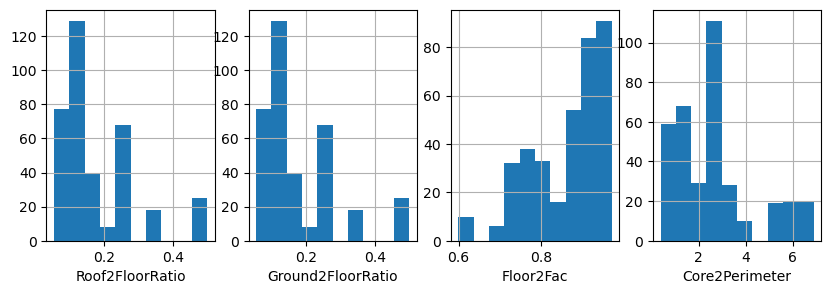

In [ ]:
ratios = ['Roof2FloorRatio', 'Ground2FloorRatio', 'Floor2Fac', 'Core2Perimeter']
fig, axs = plt.subplots(1, 4, figsize=(10, 3))

for i, ratio in enumerate(ratios):
    umi.shoeboxdf[ratio].hist(ax=axs[i])
    print(f"{ratio} min: {umi.shoeboxdf[ratio].min()}, max {umi.shoeboxdf[ratio].max()}")
    axs[i].set_xlabel(ratio)
fig.show()

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3))

umi.shoeboxdf['Roof2FloorRatio'].hist(ax=axs[0])
axs[0].set_xlabel('roof2footprint')

1/umi.shoeboxdf['Ground2FloorRatio'].hist(ax=axs[1])
axs[1].set_xlabel('footprint2ground')

1/umi.shoeboxdf['Ground2FloorRatio'].hist(ax=axs[2])
axs[2].set_xlabel('footprint2ground')

Area and ratio calcs check

In [7]:
shoebox_collection = umi._fetch_shoeboxcollection()

INFO:UmiSurrogate:Fetching shoebox IDFs.
INFO:UmiSurrogate:Completed fetching shoebox IDFs in 34 seconds.


In [8]:
core_areas = []
perim_areas = []
areas = []
widths = []
lengths = []

for name, sb in shoebox_collection.items():
    areas.append(sb.total_building_area)
    widths.append(sb.width)
    lengths.append(sb.length)
    perim_areas.append(sb.idfobjects["ZONE"][0].Floor_Area)
    core_areas.append(sb.idfobjects["ZONE"][1].Floor_Area)

In [34]:
print(shoebox_collection[0].length)
print(shoebox_collection[0].width)
print(shoebox_collection[0].width*shoebox_collection[0].length)
print(3*shoebox_collection[0].length)
print(shoebox_collection[0].idfobjects["ZONE"][0].Floor_Area)
print(
    shoebox_collection[0].idfobjects["ZONE"][0].Floor_Area + 
    shoebox_collection[0].idfobjects["ZONE"][1].Floor_Area
    )
print(shoebox_collection[0].total_building_area)


7.076999999999998
5.545999999999822
39.24904199999873
21.230999999999995
8.23891597955898
19.236245874794278
19.2362003501039


In [42]:
print(max(areas))
print(min(areas))

61.27799083525315
19.236060654977337


In [43]:
print(max(widths))
print(min(widths))
print(max(lengths))
print(min(lengths))

20.496399999999994
3.0230000000001382
20.496399999999994
3.0372999999999593


In [27]:
print(max(core_areas))
print(min(core_areas))

52.2856183545691
10.9973298952291


In [28]:
print(max(perim_areas))
print(min(perim_areas))

8.99149347911125
8.15615500845583


## Plot the building parameter distributions

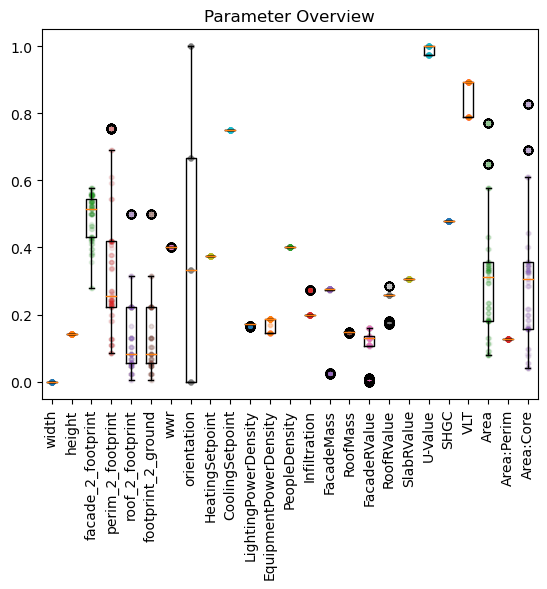

In [14]:
umi.surrogate_plot_params(start_ix=0, count=364, include_whiskers=True, title="Parameter Overview")

Plot the results

In [15]:
import torch
from sklearn.metrics import r2_score

def plot_model_fits(true_loads, pred_loads):
    true_loads = torch.sum(true_loads, axis=2)
    pred_loads = torch.sum(pred_loads, axis=2)
    maxes = torch.max(true_loads, dim=0)[0].reshape(1, 4)
    true_loads = true_loads / maxes
    pred_loads = pred_loads / maxes
    true_loads = true_loads.cpu()
    pred_loads = pred_loads.cpu()
    r2_scores = []
    for i, zone_name in enumerate(
        ("Perimeter Heating", "Perimeter Cooling", "Core Heating", "Core Cooling")
    ):
        r2 = r2_score(true_loads[:, i], pred_loads[:, i])
        print(zone_name, r2)
        r2_scores.append(r2)
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    identity = np.linspace(0, 1, 10)
    plt.suptitle("Annual Model Fits")
    axs[0, 0].scatter(true_loads[:, 0], pred_loads[:, 0], s=1, alpha=0.3)
    axs[0, 1].scatter(true_loads[:, 1], pred_loads[:, 1], s=1, alpha=0.3)
    axs[1, 0].scatter(true_loads[:, 2], pred_loads[:, 2], s=1, alpha=0.3)
    axs[1, 1].scatter(true_loads[:, 3], pred_loads[:, 3], s=1, alpha=0.3)
    axs[0, 0].plot(identity, identity, color="dodgerblue", label="Perfect Model")
    axs[0, 1].plot(identity, identity, color="dodgerblue")
    axs[1, 0].plot(identity, identity, color="dodgerblue")
    axs[1, 1].plot(identity, identity, color="dodgerblue")
    axs[0, 0].set_ylabel("Perimeter")
    axs[1, 0].set_ylabel("Core")
    axs[1, 0].set_xlabel("Heating")
    axs[1, 1].set_xlabel("Cooling")
    axs[0, 0].legend()
    fig.tight_layout()

In [16]:
true_loads.max()

tensor(4.3207, device='cuda:0')

In [17]:
pred_loads.max()

tensor(0.5006, device='cuda:0')

Perimeter Heating -122.76309747322574
Perimeter Cooling -4.032904622909766
Core Heating -1.532234934407858
Core Cooling -2.8965888762895418


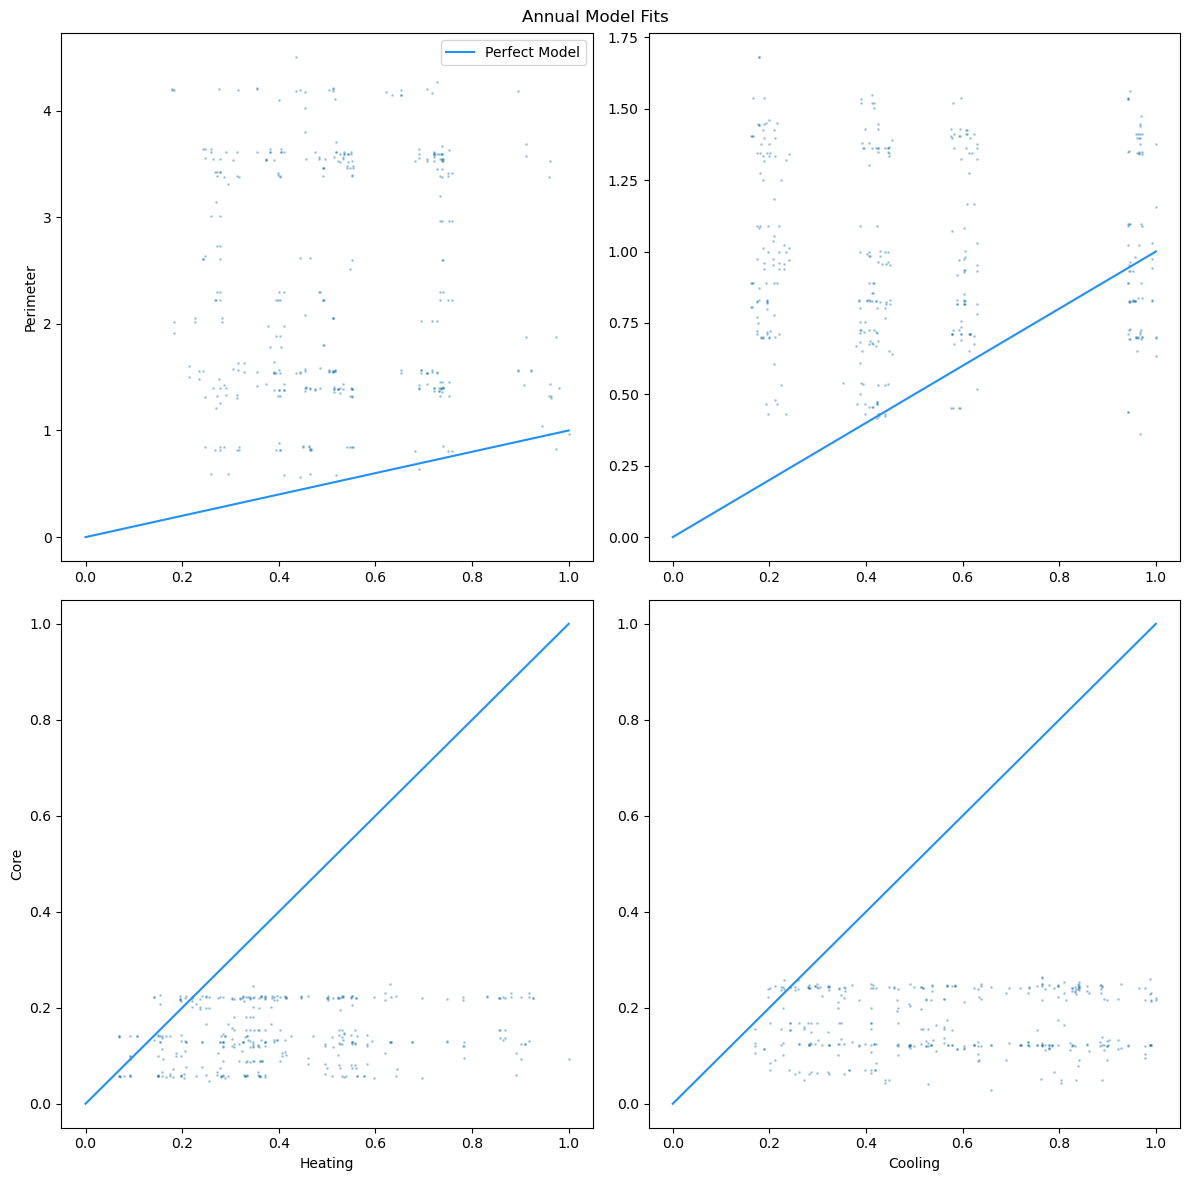

In [18]:
plot_model_fits(true_loads, pred_loads)

Monthly comparison

In [19]:
def plot_model_comparisons(true_loads, pred_loads, plot_count=4, ylim=[-0.01, 1]):
    ix = np.random.choice(np.arange(true_loads.shape[0]), plot_count, replace=False)
    for i in ix:
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        plt.suptitle("Model Comparison")
        axs[0].plot(true_loads[i, 0].cpu(), label="Heating (true)")
        axs[0].plot(true_loads[i, 1].cpu(), label="Cooling (true)")
        axs[1].plot(true_loads[i, 2].cpu(), label="Heating (true)")
        axs[1].plot(true_loads[i, 3].cpu(), label="Cooling (true)")
        axs[0].plot(pred_loads[i, 0].cpu(), "-o", label="Heating (predicted)")
        axs[0].plot(pred_loads[i, 1].cpu(), "-o", label="Cooling (predicted)")
        axs[1].plot(pred_loads[i, 2].cpu(), "-o", label="Heating (predicted)")
        axs[1].plot(pred_loads[i, 3].cpu(), "-o", label="Cooling (predicted)")
        axs[0].set_ylim(ylim)
        axs[1].set_ylim(ylim)
        axs[0].set_title("Perimeter")
        axs[1].set_title("Core")
        axs[0].legend()
        axs[1].legend()


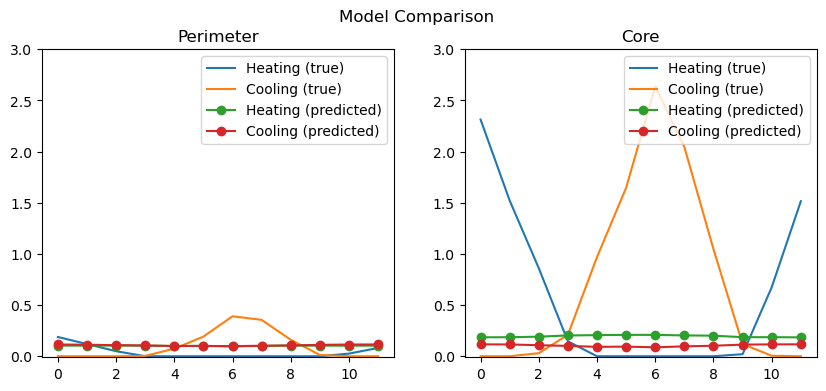

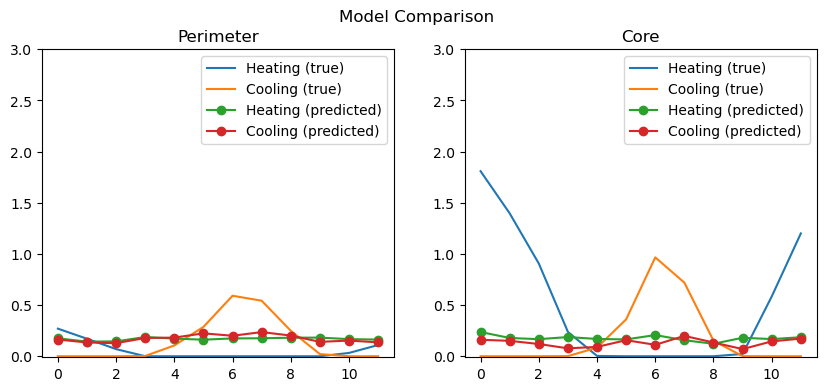

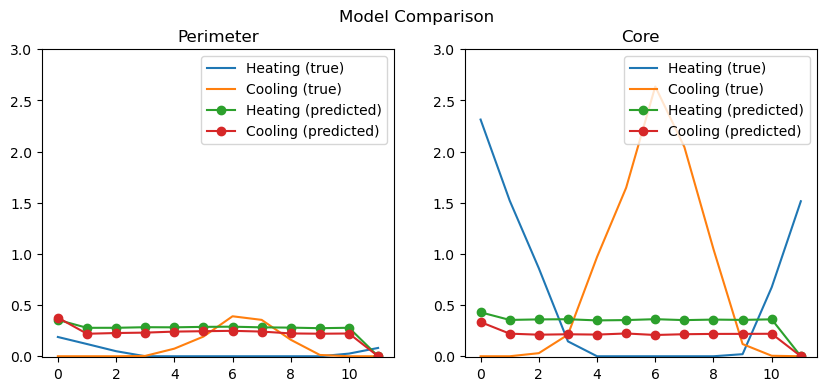

In [20]:
plot_model_comparisons(true_loads, pred_loads, plot_count=3, ylim=[-0.01, 3])

Plot the errors/losses

In [26]:
print(all_losses.mean())
print(all_losses.min())
print(all_losses.max())

tensor(0.3761, device='cuda:0')
tensor(0.1948, device='cuda:0')
tensor(0.9328, device='cuda:0')


## Visualizations

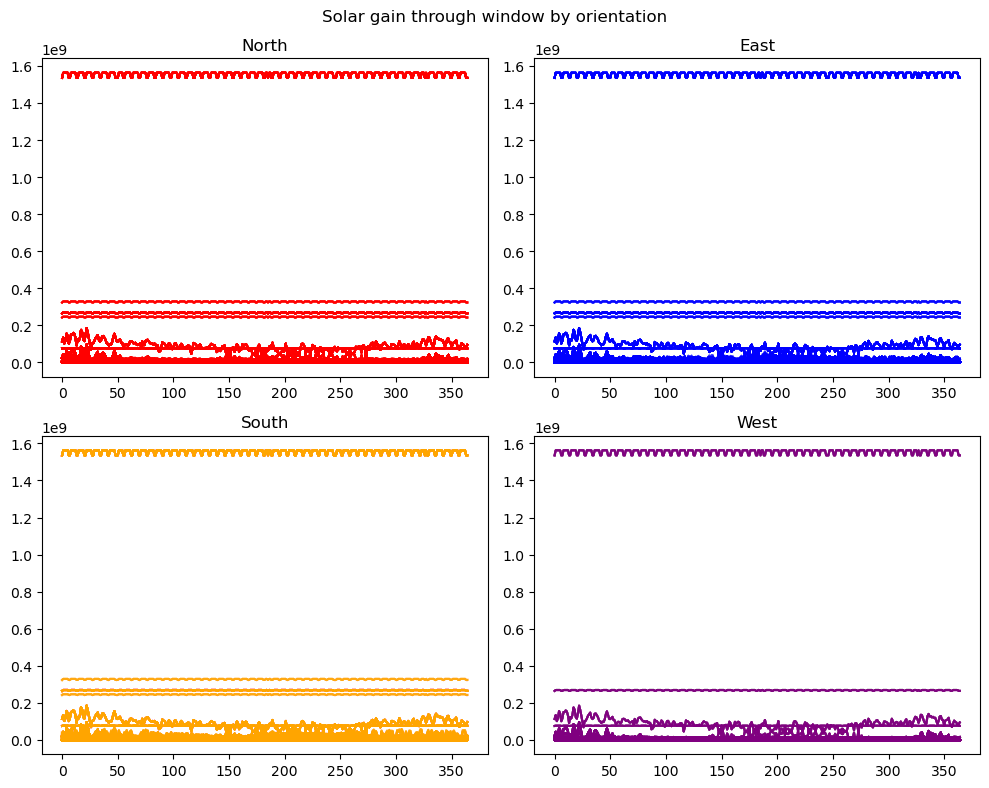

In [ ]:
# Plot all of the radiation values

import matplotlib.pyplot as plt
from pandas import DatetimeIndex

orient_lookup = {
    'North': 0,
    'East': 1,
    'South': 2,
    'West': 3
}
cols = ['red', 'blue', 'orange', 'purple']

shoebox_ids = umi.get_shoebox_template_ids(0, 364)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for sb_id in shoebox_ids:
    orient = umi.shoeboxdf['Orientation'][sb_id] #.to_list()[0]
    idf_path = umi.shoeboxdf['ShoeboxPath'][sb_id]
    csv_path = idf_path.replace("idf", "csv")
    df = pd.read_csv(csv_path)
    rad = df['PERIM:Zone Windows Total Transmitted Solar Radiation Energy [J](Hourly)']
    rad = df.groupby(np.arange(len(rad))//24).sum()
    axes[orient_lookup[orient]].plot(rad, cols[orient_lookup[orient]],alpha=0.1)
for i, ax in enumerate(axes):
    ax.set_title(list(orient_lookup.keys())[i])
fig.suptitle("Solar gain through window by orientation")
fig.tight_layout()
plt.show()